<a href="https://colab.research.google.com/github/ayydannm/MachineLearning/blob/main/training_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
w=10
x=2
y=5


def f(w,x,y):
  return w*x-y
f(w,x,y)

15

In [ ]:
w=w-0.1*x
f(w,x,y)

14.600000000000001

In [ ]:
def f(w,x,y):
  return 0.5*((w*x-y)**2)

def gradient(w,x,y):
  return (w*x-y)*x


w=10
x=2
y=10
alpha=0.1
losses=[]

for i in range(10):
  grad=gradient(w,x,y)
  w=w-alpha*grad
  loss=f(w,x,y)
  losses.append(loss)
  print(f"Step {i+1}:w={w:.4f},Loss={loss:.4f}")

Step 1:w=8.0000,Loss=18.0000
Step 2:w=6.8000,Loss=6.4800
Step 3:w=6.0800,Loss=2.3328
Step 4:w=5.6480,Loss=0.8398
Step 5:w=5.3888,Loss=0.3023
Step 6:w=5.2333,Loss=0.1088
Step 7:w=5.1400,Loss=0.0392
Step 8:w=5.0840,Loss=0.0141
Step 9:w=5.0504,Loss=0.0051
Step 10:w=5.0302,Loss=0.0018


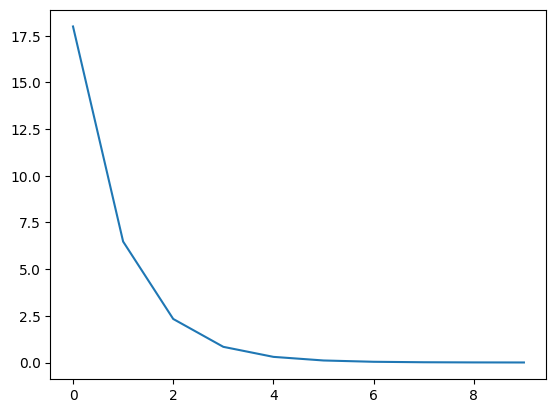

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses);

In [ ]:
import numpy as np
X=np.arange(0,100,2)
X=X.reshape(-1,1)

In [ ]:
y=X*2
y

array([[  0],
       [  4],
       [  8],
       [ 12],
       [ 16],
       [ 20],
       [ 24],
       [ 28],
       [ 32],
       [ 36],
       [ 40],
       [ 44],
       [ 48],
       [ 52],
       [ 56],
       [ 60],
       [ 64],
       [ 68],
       [ 72],
       [ 76],
       [ 80],
       [ 84],
       [ 88],
       [ 92],
       [ 96],
       [100],
       [104],
       [108],
       [112],
       [116],
       [120],
       [124],
       [128],
       [132],
       [136],
       [140],
       [144],
       [148],
       [152],
       [156],
       [160],
       [164],
       [168],
       [172],
       [176],
       [180],
       [184],
       [188],
       [192],
       [196]])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)


LinearRegression()

In [ ]:
lin_reg.score(X,y)

1.0

In [ ]:
lin_reg.predict([X[43]])

array([[172.]])

In [ ]:
X[43]

array([86])

In [ ]:
def f(w,X,y):
  return 0.5*np.sum((w*X-y)**2)/len(X)

def gradient(w,X,y):
  return np.sum((w*X-y)*X)/len(X)

w=10
X=np.arange(0,100,2)
y=X*2
alpha=0.0001
losses=[]

for i in range(10):
  grad=gradient(w,X,y)
  w=w-alpha*grad
  loss=f(w,X,y)
  losses.append(loss)
  print(f"Step {i+1}:w={w:.4f},Loss={loss:.4f},grad={grad:.4f}")

Step 1:w=7.4128,Loss=47375.5190,grad=25872.0000
Step 2:w=5.6623,Loss=21687.9233,grad=17504.9952
Step 3:w=4.4779,Loss=9928.4615,grad=11843.8798
Step 4:w=3.6766,Loss=4545.1261,grad=8013.5690
Step 5:w=3.1344,Loss=2080.7022,grad=5421.9808
Step 6:w=2.7675,Loss=952.5196,grad=3668.5122
Step 7:w=2.5193,Loss=436.0516,grad=2482.1154
Step 8:w=2.3514,Loss=199.6190,grad=1679.3993
Step 9:w=2.2377,Loss=91.3831,grad=1136.2815
Step 10:w=2.1608,Loss=41.8340,grad=768.8081


In [ ]:
import numpy as np
np.random.seed(42)
m=100
X=2*np.random.rand(m,1)
y=4+3*X+np.random.rand(m,1)

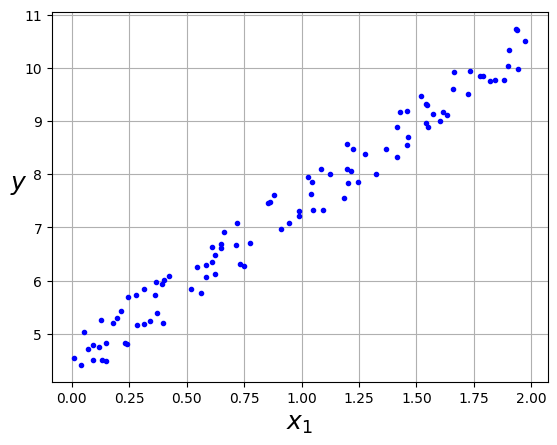

In [ ]:
plt.plot(X, y,'b.')
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import add_dummy_feature
X_b=add_dummy_feature(X)
X_b[:5]


array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [ ]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [ ]:
theta_best=np.linalg.inv(X_b.T @ X_b) @ (X_b.T @ y)
theta_best

array([[4.51359766],
       [2.98323418]])

In [ ]:
X_new=np.array([[0],[2]])
X_new_b=add_dummy_feature(X_new)
y_predict=X_new_b @ theta_best

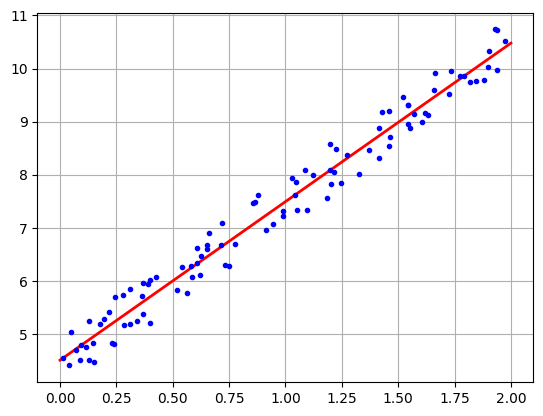

In [ ]:
plt.plot(X_new,y_predict,"r-",linewidth=2,label="Predictions")
plt.plot(X,y,"b.",label="Training data")
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
# def plot_model(model_class, polynomial, alphas, **model_kwargs):
#     plt.plot(X, y, "b.", linewidth=3)
#     for alpha, style in zip(alphas, ("b:", "g--", "r-")):
#         if alpha > 0:
#             model = model_class(alpha, **model_kwargs)
#         else:
#             model = LinearRegression()
#         if polynomial:
#             model = make_pipeline(
#                 PolynomialFeatures(degree=10, include_bias=False),
#                 StandardScaler(),
#                 model)
#         model.fit(X, y)
#         y_new_regul = model.predict(X_new)
#         plt.plot(X_new, y_new_regul, style, linewidth=2,
#                  label=fr"$\alpha = {alpha}$")
#     plt.legend(loc="upper left")
#     plt.xlabel("$x_1$")
#     plt.axis([0, 3, 0, 3.5])
#     plt.grid()

# plt.figure(figsize=(9, 3.5))
# plt.subplot(121)
# plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
# plt.ylabel("$y$  ", rotation=0)
# plt.subplot(122)
# plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
# plt.show()

#Batch Gradient Descend

In [ ]:
np.random.seed(42)
eta=0.1 # learning rate
n_epochs=1000 #addim sayi
m=len(X_b) #traingdeki data sayi
theta=np.random.randn(2,1)

for i in range(n_epochs):
  gradients=(1/m)*(X_b.T @ (X_b @ theta-y))
  theta=theta-eta*gradients
print(theta)

[[4.51359763]
 [2.9832342 ]]


#Stochastic Gradient Descend

In [ ]:
n_epochs=50
theata=np.random.randn(2,1)


for epoch in range(n_epochs):
  for i in range(m):
    random_index=np.random.randint(m)
    xi=X_b[random_index:random_index+1]
    yi=y[random_index:random_index+1]
    gradients=xi.T @ (xi@ theata -yi)
    theata=theata-eta * gradients

print(theata)

[[4.49700269]
 [3.0055587 ]]


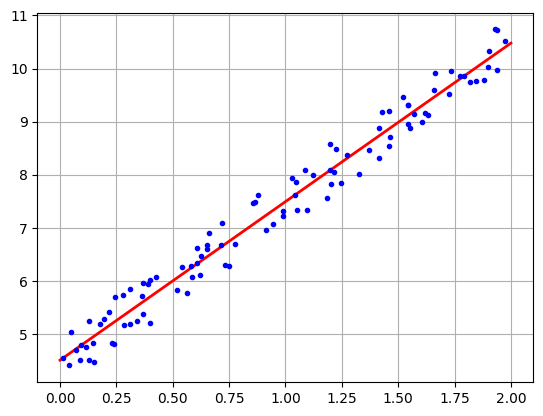

In [ ]:
X_new=np.array([[0],[2]])
X_new_b=add_dummy_feature(X_new)
y_predict=X_new_b @ theta


plt.plot(X_new,y_predict,"r-",linewidth=2,label="Predictions")
plt.plot(X,y,"b.",label="Training data")
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,eta0=0.1,
                     random_state=42,n_iter_no_change=100)
sgd_reg.fit(X,y.ravel())
sgd_reg.coef_,sgd_reg.intercept_

(array([2.97002316]), array([4.50448294]))

#Mini-batch Gradient Descend

In [ ]:
# n_epochs=50
# batch_size = 20
# theata=np.random.randn(2,1)
# m = X_b.shape[0]


# for epoch in range(n_epochs):
#     shuffled_indices = np.random.permutation(m)
#     X_b_shuffled = X_b[shuffled_indices]
#     y_shuffled = y[shuffled_indices]
#     for i in range(0,m,batch_size):
#      xi = X_b_shuffled[i:i+batch_size]
#      yi = y_shuffled[i:i+batch_size]
#      gradients=xi.T @ (xi@ theata -yi)
#      theata=theata-eta * gradients

# print(theata)

In [ ]:
n_epochs = 50
batch_size = 20
theta = np.random.randn(2, 1)
m = X_b.shape[0]

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0, m, batch_size):
        # Son batch üçün maksimum indeksi yoxlayırıq
        end_index = min(i + batch_size, m)
        xi = X_b_shuffled[i:end_index]  # Son batch kiçikdirsə, onu düzgün götür
        yi = y_shuffled[i:end_index]

        gradients = xi.T @ (xi @ theta - yi)
        theta = theta - eta * gradients

print(theta)


[[-1.10936081e+123]
 [-1.17146583e+123]]


#Polynomial Features

In [ ]:
np.random.seed(42)
m=100
X=6* np.random.rand(m,1)-3
y=0.5 * X**2 +X+2+np.random.randn(m,1)

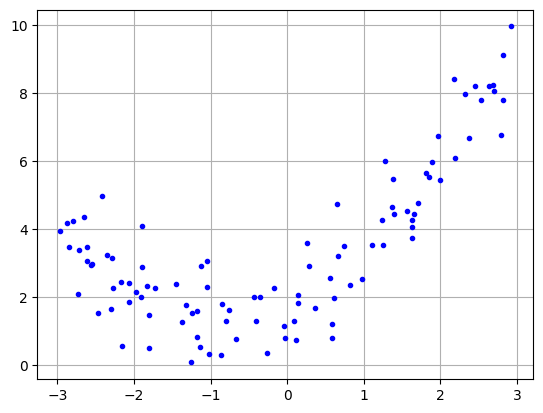

In [ ]:
plt.plot(X,y,'b.')
plt.grid()
plt.show()

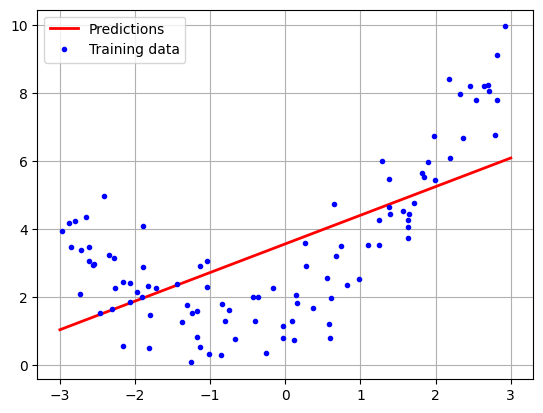

In [ ]:
X_new=np.linspace(-3,3,100).reshape(100,1)

lin_reg=LinearRegression()
lin_reg.fit(X,y)
y_predicts=lin_reg.predict(X_new)

plt.plot(X_new,y_predicts,'r-',linewidth=2,label='Predictions')
plt.plot(X,y,'b.',label='Training data')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly.fit_transform(X)

X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

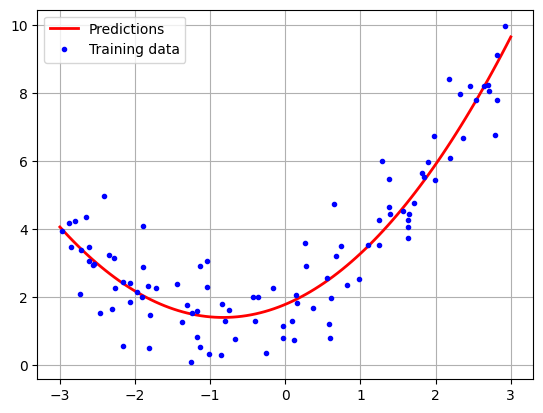

In [ ]:
X_new_poly=poly.transform(X_new)
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
y_predicts=lin_reg.predict(X_new_poly)
plt.plot(X_new,y_predicts,"r-",linewidth=2,label="Predictions")
plt.plot(X,y,"b.",label="Training data")
plt.legend()
plt.grid();

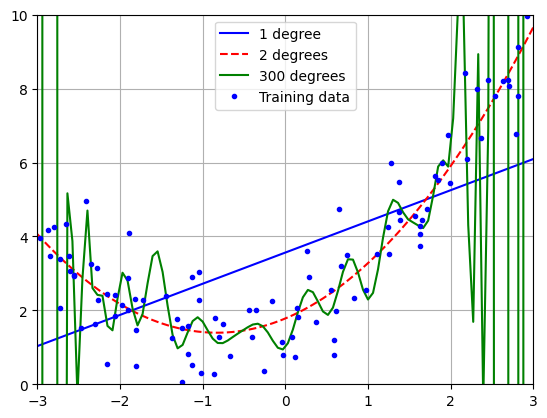

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for degree,style in ((1,'b-'),(2,'r--'),(300,'g-')):
  poly=PolynomialFeatures(degree=degree,include_bias=False)
  std_scaler=StandardScaler()
  lin_reg=LinearRegression()
  polynomial_regression=Pipeline([
      ("poly_features",poly),
      ("std_scaler",std_scaler),
      ("lin_reg",lin_reg)
  ])
  polynomial_regression.fit(X,y)
  y_predicts=polynomial_regression.predict(X_new)
  label=f"{degree} degree"+('s' if degree>1 else '')
  plt.plot(X_new,y_predicts,style,label=label)
  plt.axis([-3,3,0,10])

plt.plot(X,y,"b.",label="Training data")
plt.legend()
plt.grid()

#Ridge rugelarization

In [ ]:
np.random.seed(42)
m=20
X=3*np.random.rand(m,1)
y=1+0.5*X+np.random.randn(m,1)/1.5
X_new=np.linspace(0,3,100).reshape(100,1)

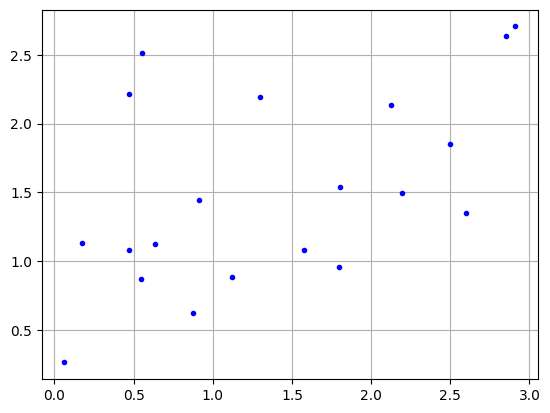

In [ ]:
plt.plot(X,y,'b.')
plt.grid();


In [ ]:
from sklearn.linear_model import Ridge  #L2

ridge_reg=Ridge(alpha=1,random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([1.55071465])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(random_state=42,penalty='l2')
sgd_reg.fit(X,y.ravel())

SGDRegressor(random_state=42)

#Lasso regularization

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

#Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

# Logistic Regression

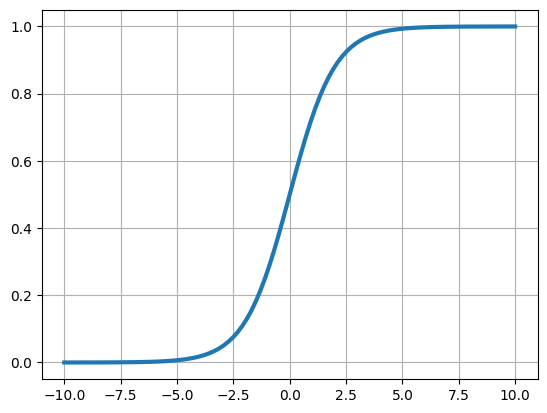

In [ ]:
z=np.linspace(-10,10,100)
sigmoid=1/(1+np.exp(-z))

plt.plot(z,sigmoid,linewidth=3)
plt.grid();

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris=load_iris(as_frame=True)
X=iris.data
y=iris.target

X_train,X_test,y_train,y_test=train_test_split(X,y)

log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.868421052631579

In [ ]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
118,7.7,2.6,6.9,2.3
98,5.1,2.5,3.0,1.1
96,5.7,2.9,4.2,1.3
48,5.3,3.7,1.5,0.2
117,7.7,3.8,6.7,2.2
...,...,...,...,...
148,6.2,3.4,5.4,2.3
3,4.6,3.1,1.5,0.2
105,7.6,3.0,6.6,2.1
53,5.5,2.3,4.0,1.3


In [ ]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


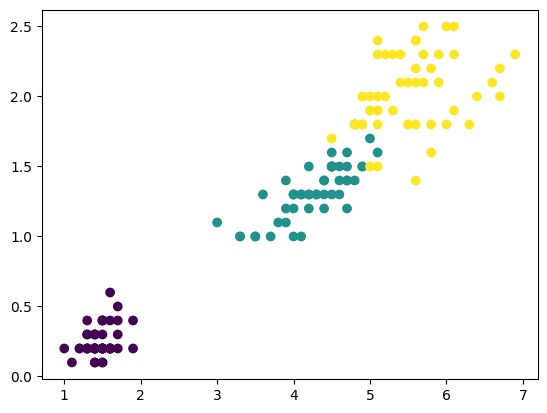

In [ ]:
plt.scatter(X['petal length (cm)'],X['petal width (cm)'],c=y);